In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [39]:
metrics = ['rmse', 'mae', 'smape', 'r2', 'forecast_bias', 'training_time']

base_dir = "../results/metrics"

# Initialize an empty list to store dataframes
dfs = []

# List of subdirectories
subdirs = ['cnn', 'lstm', 'rnn', 'tcn', 'xgb', 'gbm']

# Loop through each subdirectory and read the metrics.csv file
for subdir in subdirs:
    file_path = os.path.join(base_dir, subdir, 'metrics.csv')
    df = pd.read_csv(file_path)
    df['model'] = subdir  # Add a column for the model type
    dfs.append(df)

# Concatenate all dataframes
df = pd.concat(dfs, ignore_index=True)

In [40]:
df.head(20)

,model_name,window_size,rmse,mae,smape,r2,forecast_bias,training_time,model
0,cnn,7,1.843805,1.426336,20.675305,0.937306,0.486282,51.649333,cnn
1,cnn,14,1.942795,1.522642,21.490224,0.930439,-0.680948,33.487387,cnn
2,cnn,30,1.781208,1.387113,20.788647,0.941546,0.030387,49.612767,cnn
3,cnn,60,1.754635,1.349301,19.818515,0.941860,-0.055523,66.483721,cnn
4,cnn,120,1.974348,1.544316,21.417847,0.926651,0.581827,111.066663,cnn
5,cnn,180,1.988583,1.556302,21.367519,0.925623,0.668074,47.685475,cnn
6,cnn,270,1.912794,1.470641,23.407765,0.927989,-0.520008,70.102024,cnn
7,cnn,365,1.882898,1.462337,21.416147,0.931204,0.340863,59.584921,cnn
8,lstm,7,1.948503,1.507798,22.029737,0.929984,0.033705,88.115360,lstm
9,lstm,14,2.080966,1.627083,22.617143,0.920193,0.080551,37.048645,lstm


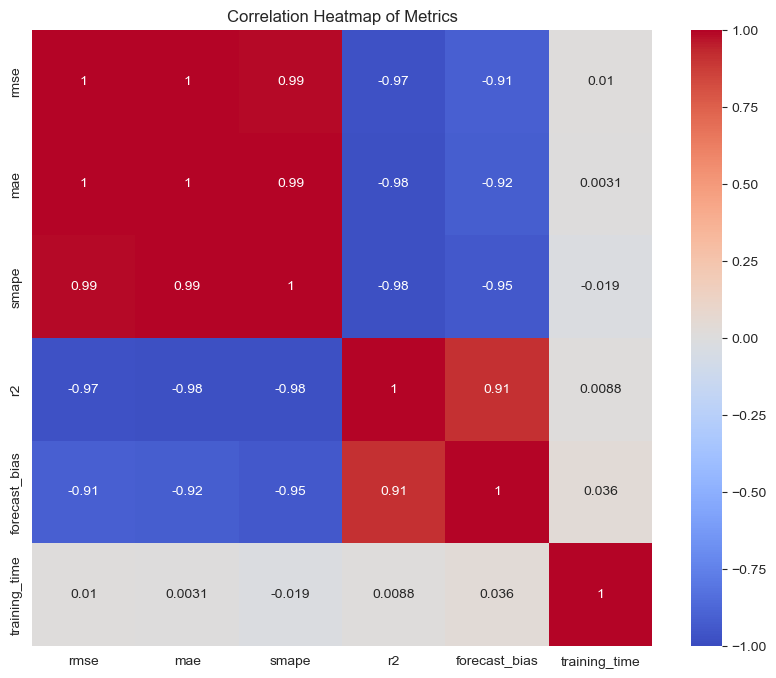

In [41]:
# Correlation Heatmap of Metrics
metrics_only = df[['rmse', 'mae', 'smape', 'r2', 'forecast_bias', 'training_time']]
corr = metrics_only.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Metrics')
plt.show()


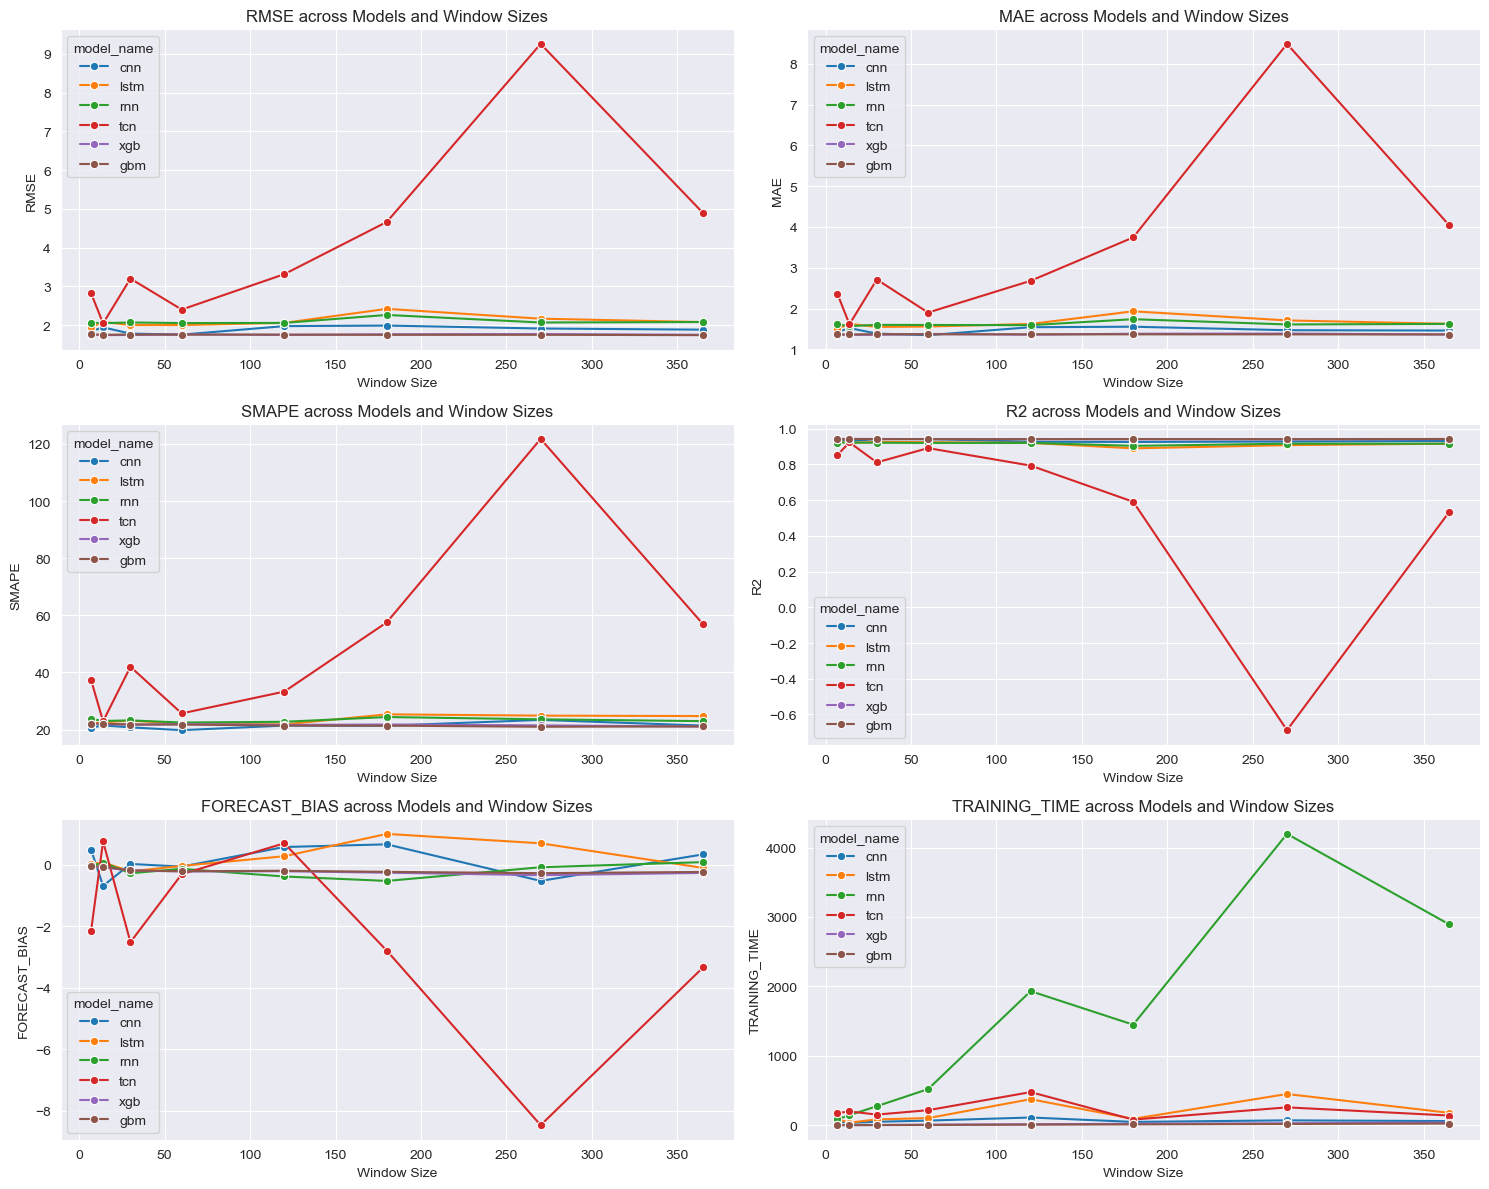

In [42]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Plot each metric in a separate subplot
for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    sns.lineplot(data=df, x='window_size', y=metric, hue='model_name', marker='o', ax=axes[row, col])
    axes[row, col].set_title(f'{metric.upper()} across Models and Window Sizes')
    axes[row, col].set_xlabel('Window Size')
    axes[row, col].set_ylabel(metric.upper())
    axes[row, col].grid(True)

# Adjust the layout
fig.tight_layout()

plt.show()

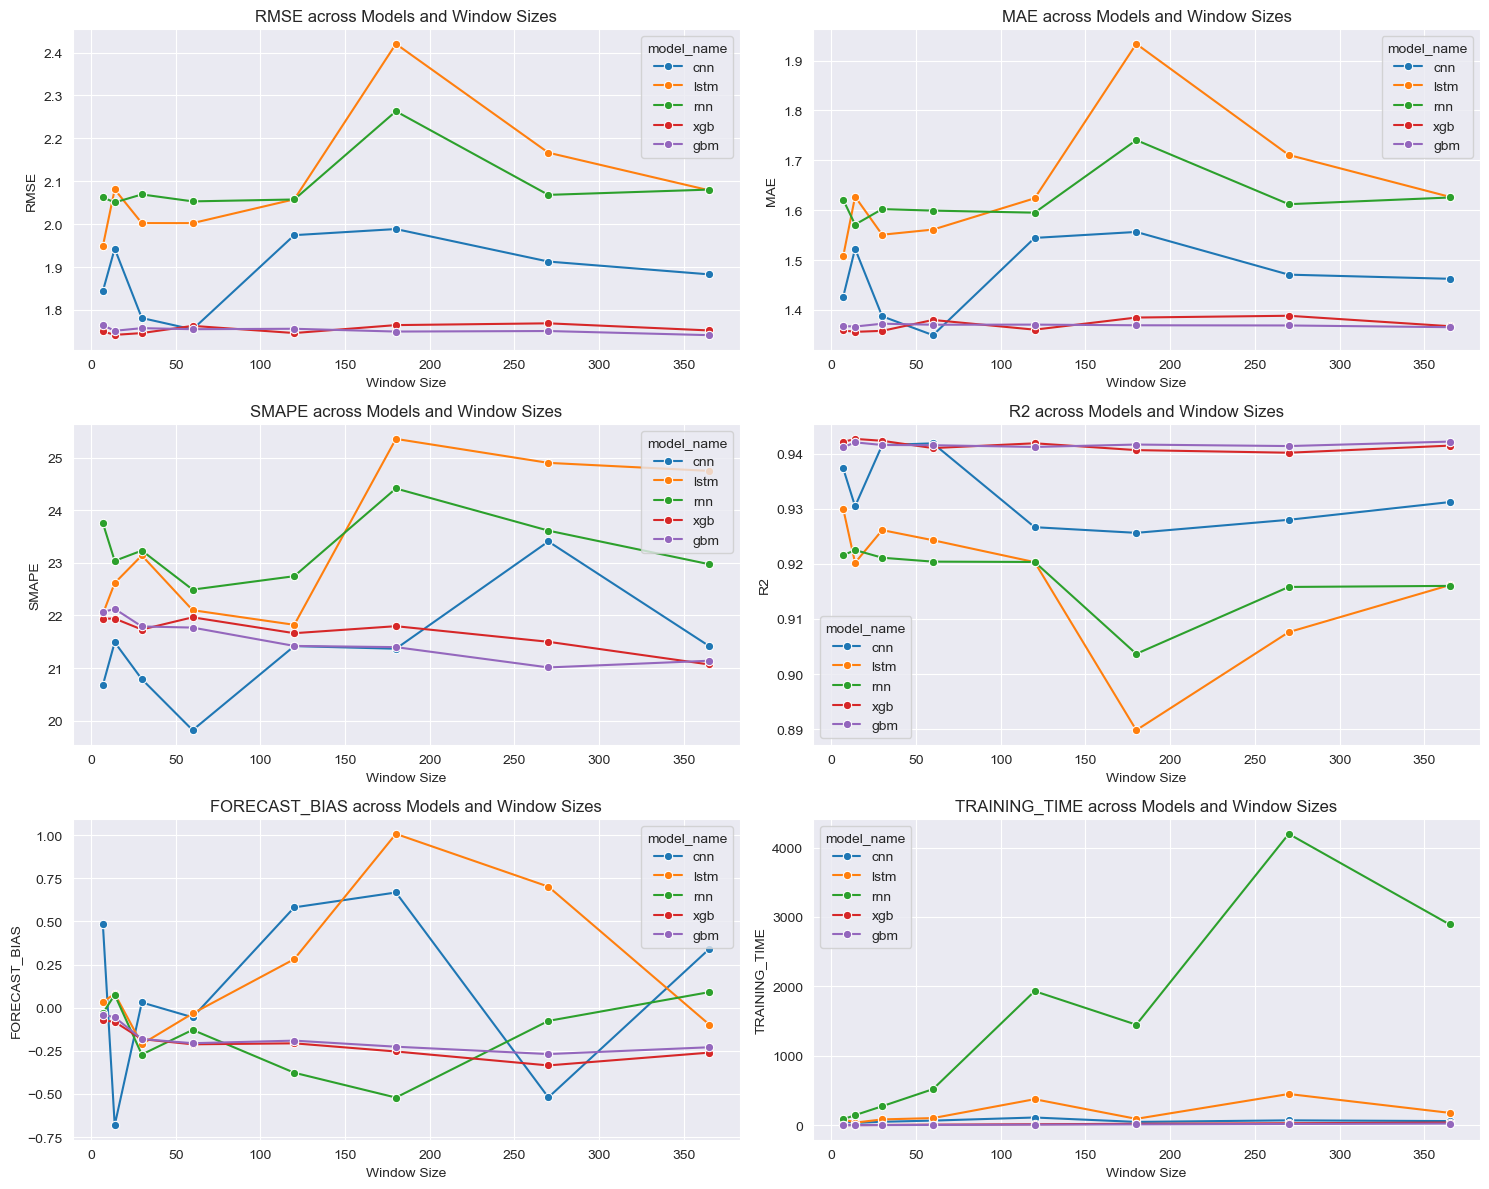

In [43]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Plot each metric in a separate subplot
for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    sns.lineplot(data=df[df['model']!= 'tcn'], x='window_size', y=metric, hue='model_name', marker='o', ax=axes[row, col])
    axes[row, col].set_title(f'{metric.upper()} across Models and Window Sizes')
    axes[row, col].set_xlabel('Window Size')
    axes[row, col].set_ylabel(metric.upper())
    axes[row, col].grid(True)

# Adjust the layout
fig.tight_layout()

plt.show()

In [44]:

metrics_only = df[['rmse', 'mae', 'smape', 'r2', 'forecast_bias', 'training_time']]


C:\Users\veit\.conda\envs\slidingWindowAnalysis\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


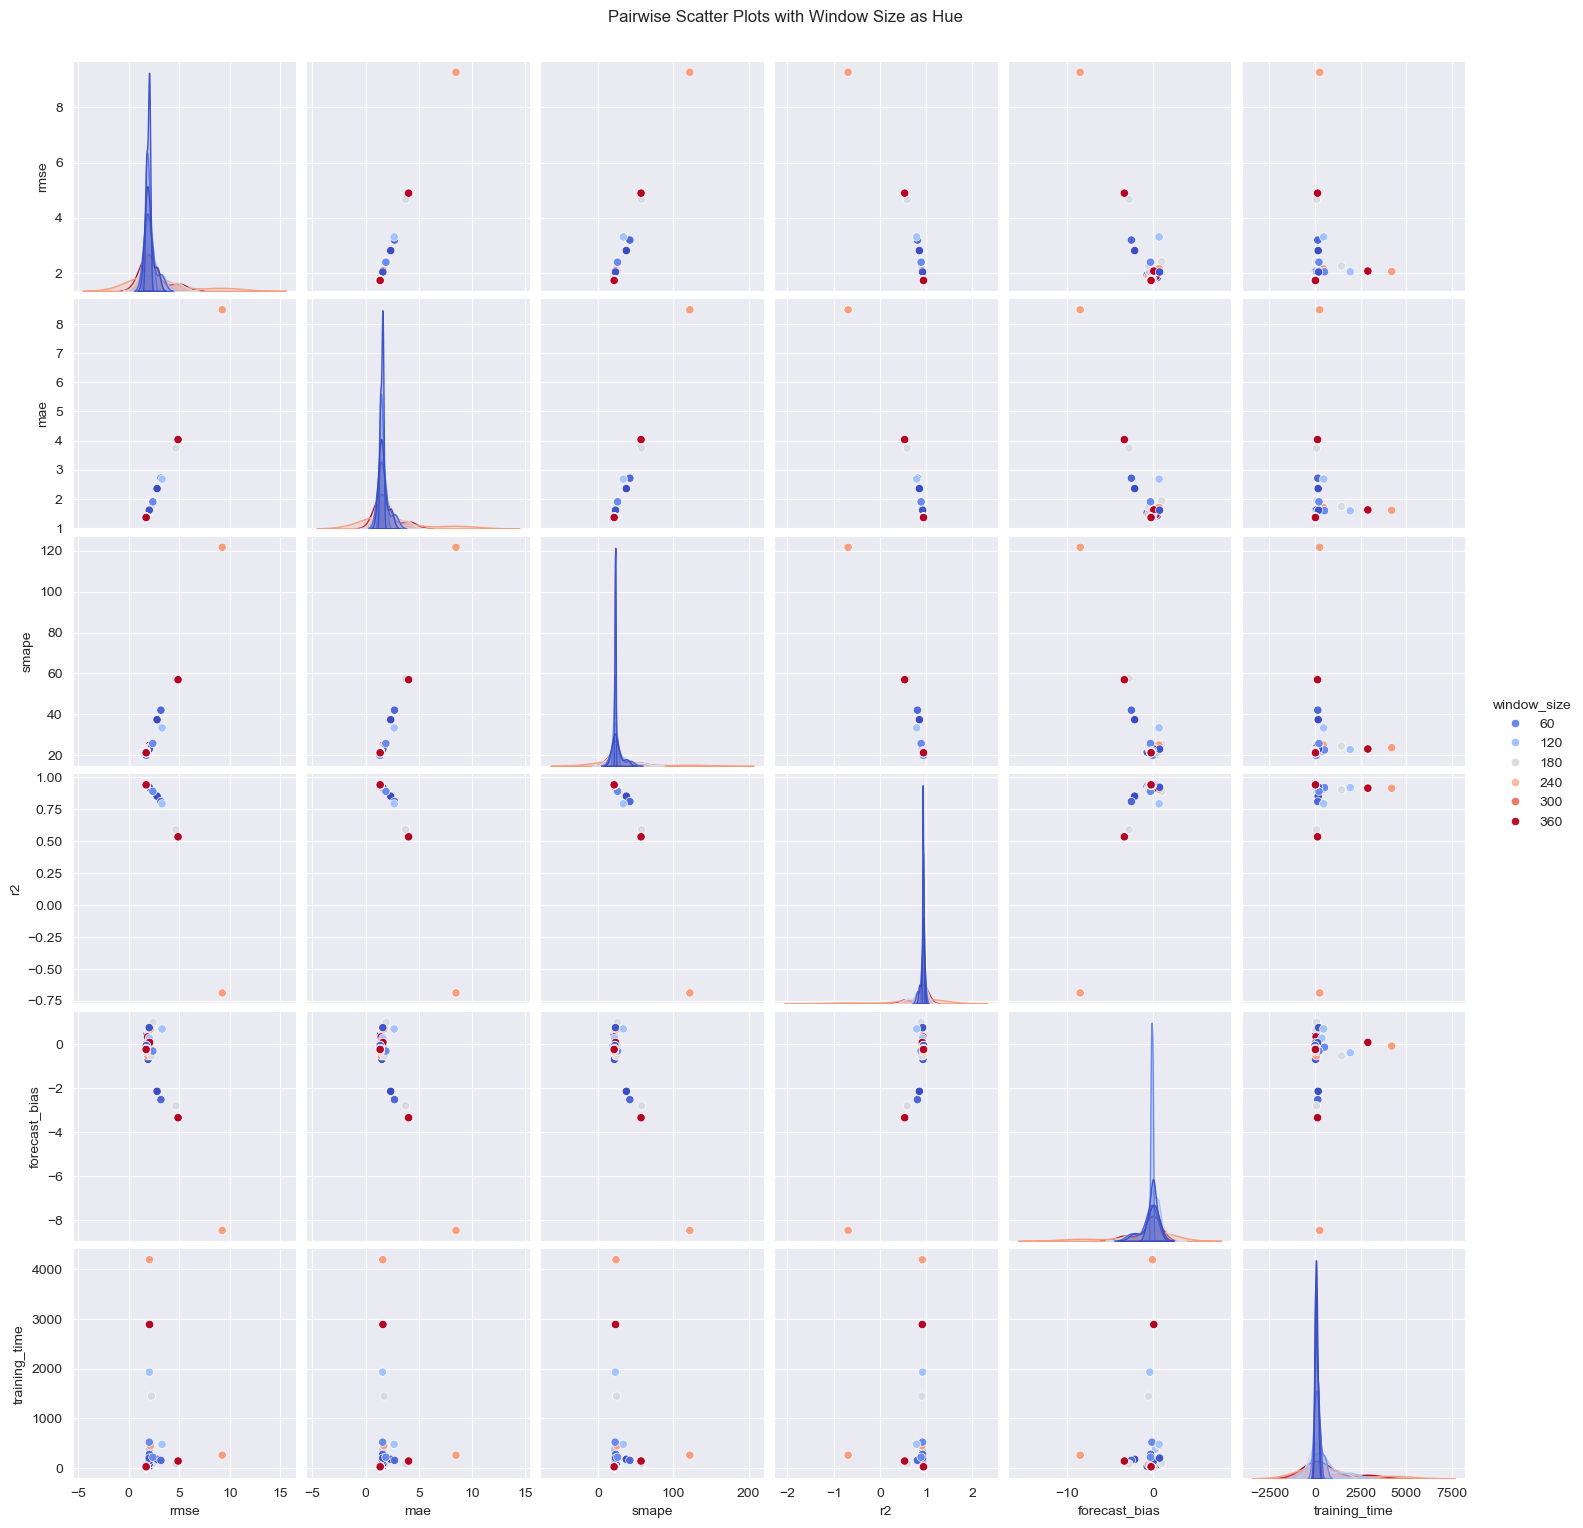

In [45]:
# Pairwise Scatter Plots
sns.pairplot(df, hue='window_size', vars=metrics, palette='coolwarm')
plt.suptitle('Pairwise Scatter Plots with Window Size as Hue', y=1.02)
plt.show()


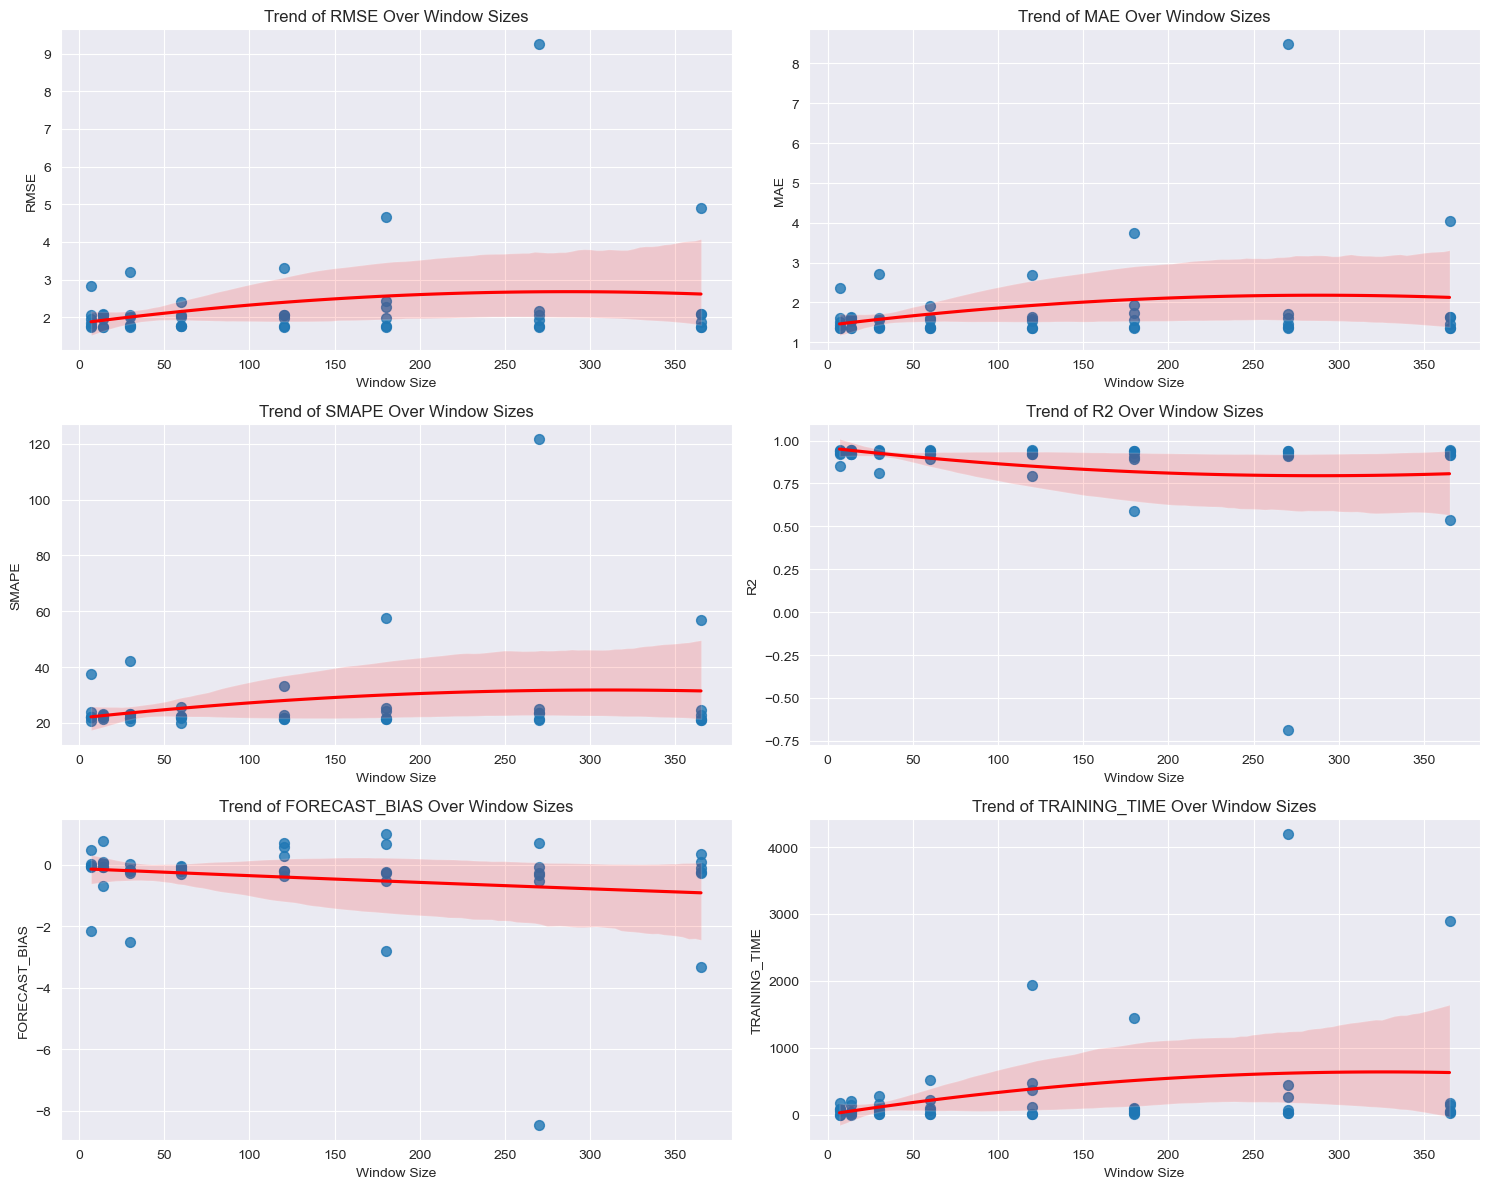

In [46]:
# Trend Lines of Metrics Over Increasing Window Sizes
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    sns.regplot(data=df, x='window_size', y=metric, ax=axes[row, col], scatter_kws={'s': 50}, order=2, line_kws={"color":"red"})
    axes[row, col].set_title(f'Trend of {metric.upper()} Over Window Sizes')
    axes[row, col].set_xlabel('Window Size')
    axes[row, col].set_ylabel(metric.upper())

fig.tight_layout()
plt.show()


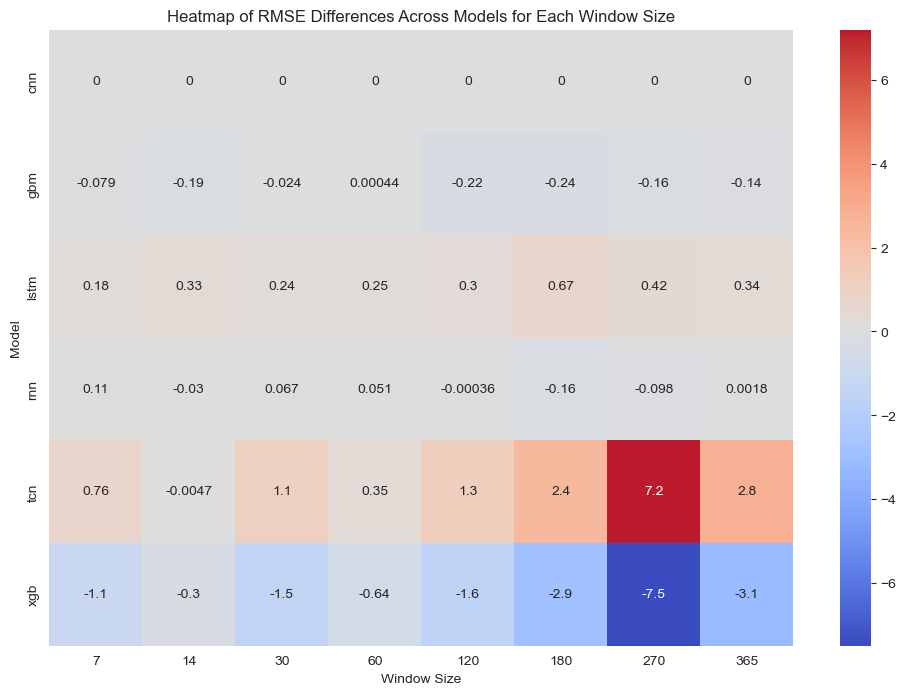

In [47]:
# Heatmap of Metric Differences Across Models for Each Window Size
diff_df = df.pivot(index='model_name', columns='window_size', values='rmse')  # Example with 'rmse'
diff_df = diff_df.diff().fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(diff_df, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of RMSE Differences Across Models for Each Window Size')
plt.xlabel('Window Size')
plt.ylabel('Model')
plt.show()
